<a href="https://colab.research.google.com/gist/annadwim/1084f85b1c7c294eaeb06f5bdd69ae4c/monte-carlo-prediksi-penjualan-dispenser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Simulasi Monte Carlo untuk Dispenser

Nama: Arya Nabil Hariri

NIM: 09021282429078

Distribusi Empiris (PMF):
   Penjualan (x)  Frekuensi  Probabilitas P(X=x)
0              4          6                 0.12
1              5          5                 0.10
2              6          9                 0.18
3              7         12                 0.24
4              8          8                 0.16
5              9          7                 0.14
6             10          3                 0.06

Fungsi Distribusi Kumulatif (CDF) dan Interval:
   Penjualan (x)  Probabilitas  CDF F(x)  Lebar Interval (x100)  \
0              4          0.12      0.12                   12.0   
1              5          0.10      0.22                   22.0   
2              6          0.18      0.40                   40.0   
3              7          0.24      0.64                   64.0   
4              8          0.16      0.80                   80.0   
5              9          0.14      0.94                   94.0   
6             10          0.06      1.00                  100.0 

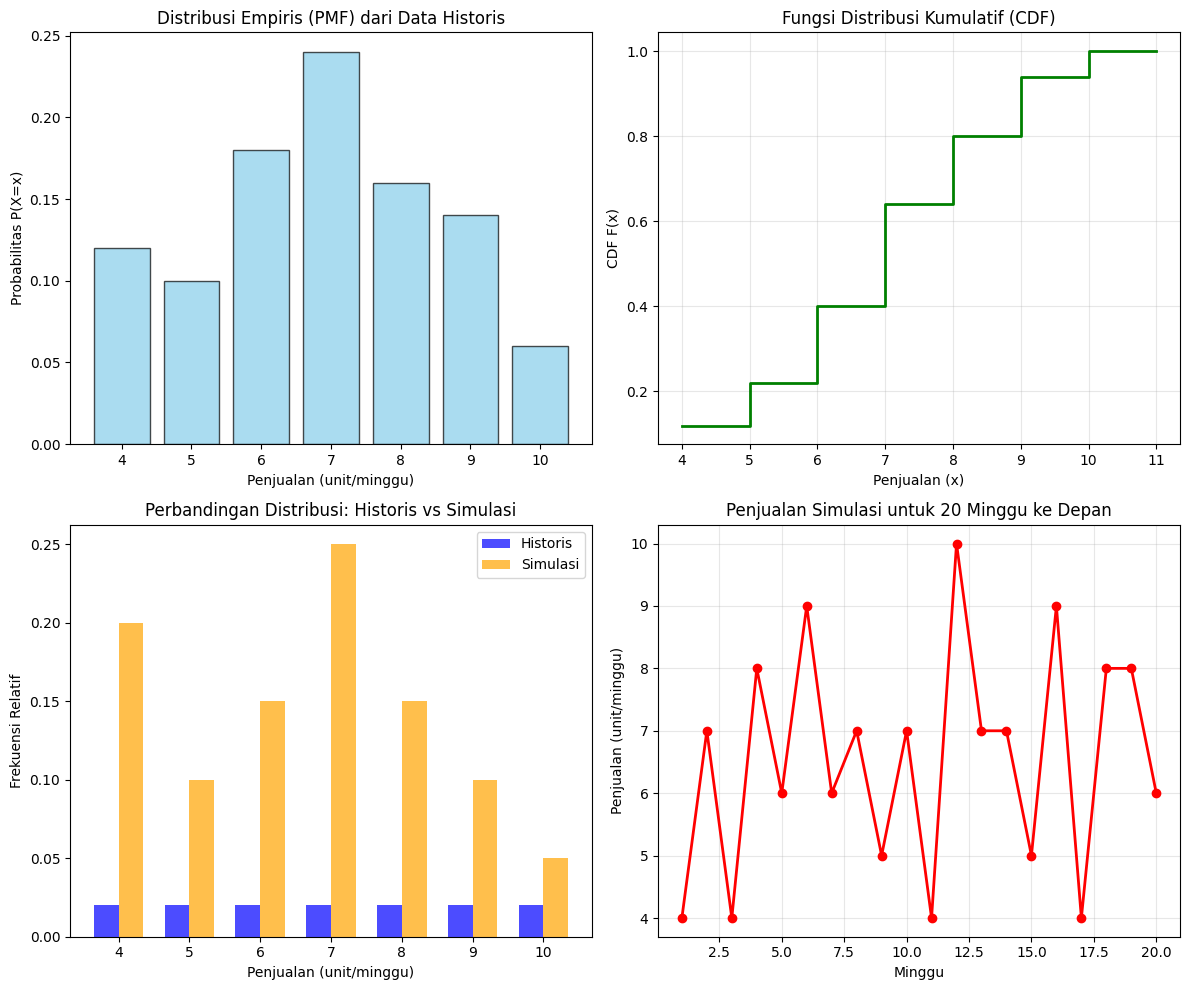

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1. Data Historis
# Penjualan (x) dan frekuensi (minggu)
historical_data = {
    'penjualan': [4, 5, 6, 7, 8, 9, 10],
    'frekuensi': [6, 5, 9, 12, 8, 7, 3]
}
total_minggu = sum(historical_data['frekuensi'])  # 50

# 2. Distribusi Empiris (PMF)
pmf = np.array(historical_data['frekuensi']) / total_minggu
pmf_df = pd.DataFrame({
    'Penjualan (x)': historical_data['penjualan'],
    'Frekuensi': historical_data['frekuensi'],
    'Probabilitas P(X=x)': np.round(pmf, 3)
})
print("Distribusi Empiris (PMF):")
print(pmf_df)

# 3. Fungsi Distribusi Kumulatif (CDF)
cdf = np.cumsum(pmf)
cdf_intervals = cdf * 100  # Untuk interval 00-99
# Interval: lower bound adalah cdf sebelumnya *100, upper adalah cdf sekarang *100
intervals = []
lower_bounds = np.insert(cdf_intervals[:-1], 0, 0)  # Mulai dari 0
for i in range(len(historical_data['penjualan'])):
    interval_str = f"{int(lower_bounds[i]):02d}–{int(cdf_intervals[i]-1):02d}" if i < len(cdf_intervals)-1 else f"{int(lower_bounds[i]):02d}–99"
    intervals.append(interval_str)

cdf_df = pd.DataFrame({
    'Penjualan (x)': historical_data['penjualan'],
    'Probabilitas': np.round(pmf, 3),
    'CDF F(x)': np.round(cdf, 3),
    'Lebar Interval (x100)': np.round(cdf_intervals, 1),
    'Interval Bilangan Acak (00-99)': intervals
})
print("\nFungsi Distribusi Kumulatif (CDF) dan Interval:")
print(cdf_df)

# 4. Bilangan Acak untuk 20 Minggu (format ke 2-digit, asumsikan 0-padded untuk angka <10)
random_numbers_str = ['12', '48', '5', '73', '29', '81', '37', '64', '19', '52',
                      '8', '95', '42', '61', '14', '87', '2', '68', '76', '33']

random_numbers = [int(num.zfill(2)) for num in random_numbers_str]  # zfill untuk 2-digit, e.g., '3' -> 03
print("\nBilangan Acak (00-99):")
print(random_numbers)

# 5. Simulasi Monte Carlo: Mapping bilangan acak ke penjualan
def map_random_to_sales(random_num, cdf_intervals, sales_values):
    for i, upper in enumerate(cdf_intervals):
        if random_num <= upper:
            return sales_values[i]
    return sales_values[-1]  # Jika tepat 100, ambil yang terakhir

simulated_sales = [map_random_to_sales(rand, cdf_intervals, historical_data['penjualan'])
                   for rand in random_numbers]

# Tabel Hasil Simulasi
simulation_df = pd.DataFrame({
    'Minggu': range(1, 21),
    'Bilangan Acak': random_numbers,
    'Penjualan Simulasi (unit/minggu)': simulated_sales
})
print("\nHasil Simulasi Monte Carlo untuk 20 Minggu:")
print(simulation_df)

# Statistik Simulasi
print(f"\nStatistik Simulasi:")
print(f"Rata-rata Penjualan: {np.mean(simulated_sales):.2f} unit/minggu")
print(f"Total Penjualan 20 Minggu: {np.sum(simulated_sales)} unit")
print(f"Standar Deviasi: {np.std(simulated_sales):.2f}")
expected_value = np.sum(np.array(historical_data['penjualan']) * pmf)
print(f"Nilai Ekspektasi E[X]: {expected_value:.2f} unit/minggu")


# 6. Visualisasi
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# a. Bar Plot PMF (Distribusi Empiris Historis)
axes[0, 0].bar(historical_data['penjualan'], pmf, color='skyblue', alpha=0.7, edgecolor='black')
axes[0, 0].set_xlabel('Penjualan (unit/minggu)')
axes[0, 0].set_ylabel('Probabilitas P(X=x)')
axes[0, 0].set_title('Distribusi Empiris (PMF) dari Data Historis')
axes[0, 0].set_xticks(historical_data['penjualan'])

# b. Step Plot CDF
x_cdf = np.concatenate([historical_data['penjualan'], [historical_data['penjualan'][-1] + 1]])
y_cdf = np.concatenate([cdf, [1.0]])
axes[0, 1].step(x_cdf, y_cdf, where='post', color='green', linewidth=2)
axes[0, 1].set_xlabel('Penjualan (x)')
axes[0, 1].set_ylabel('CDF F(x)')
axes[0, 1].set_title('Fungsi Distribusi Kumulatif (CDF)')
axes[0, 1].grid(True, alpha=0.3)

# c. Histogram Perbandingan: Historis vs Simulasi
hist_unique, hist_counts = np.unique(historical_data['penjualan'], return_counts=True)
hist_freq = hist_counts / total_minggu
sim_unique, sim_counts = np.unique(simulated_sales, return_counts=True)
sim_freq = sim_counts / len(simulated_sales)

width = 0.35
x_pos = np.arange(len(hist_unique))
axes[1, 0].bar(x_pos - width/2, hist_freq, width, label='Historis', alpha=0.7, color='blue')
axes[1, 0].bar(x_pos + width/2, [sim_freq[np.where(sim_unique == x)[0][0]] if x in sim_unique else 0
                                 for x in hist_unique], width, label='Simulasi', alpha=0.7, color='orange')
axes[1, 0].set_xlabel('Penjualan (unit/minggu)')
axes[1, 0].set_ylabel('Frekuensi Relatif')
axes[1, 0].set_title('Perbandingan Distribusi: Historis vs Simulasi')
axes[1, 0].set_xticks(x_pos)
axes[1, 0].set_xticklabels(hist_unique)
axes[1, 0].legend()

# d. Line Plot Penjualan Simulasi per Minggu
axes[1, 1].plot(simulation_df['Minggu'], simulated_sales, marker='o', color='red', linestyle='-', linewidth=2)
axes[1, 1].set_xlabel('Minggu')
axes[1, 1].set_ylabel('Penjualan (unit/minggu)')
axes[1, 1].set_title('Penjualan Simulasi untuk 20 Minggu ke Depan')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()